<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/graph_stats_for_site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOURCE : https://www.levada.ru/en/ratings/

In [1]:
import pandas as pd
import numpy as np


In [2]:
import pathlib
from datetime import date

date_work='2022-09-30'


new_dir = pathlib.Path('/content/drive/MyDrive/RUSSdata/images/', date_work)
new_dir.mkdir(parents=True, exist_ok=True)


In [3]:
president_approval= pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Putin’s approval rating.csv')

In [4]:
president_approval['date'] = pd.to_datetime(president_approval['date'].str.strip(), format='%Y-%m')

In [5]:
goverment_approval = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Approval of the government.csv')
goverment_approval['date'] = pd.to_datetime(goverment_approval['date'].str.strip(), format='%Y-%m')

In [6]:
#Approval ratings Max Min, 'Apprvove only'

mini_max = president_approval[(president_approval['Approve']==president_approval['Approve'].max()) | 
                              ( president_approval['Approve']==president_approval['Approve'].min())]
mini_max_approve = mini_max[['date','Approve']]

print('Min and Max approval values for the Russian Federation Presidency')
print(mini_max_approve.to_string(index=False))

Min and Max approval values for the Russian Federation Presidency
      date  Approve
1999-08-01     31.0
2015-06-01     89.0


In [7]:
putin_only = president_approval[president_approval['date']>'2000']
print('Min and Max approval values for Mr. Putin')
mini_max_putin =putin_only[(putin_only['Approve']==putin_only['Approve'].max()) | 
                              ( putin_only['Approve']==putin_only['Approve'].min())]
mini_max_putin_approve = mini_max_putin [['date','Approve']] 
print(mini_max_putin_approve.to_string(index=False))

Min and Max approval values for Mr. Putin
      date  Approve
2015-06-01     89.0
2020-04-01     59.0
2020-05-01     59.0


2020 amendments to the Constitution of Russia were approved on 1 July: One of the changes effectively allows the sitting Presidet to run again for office. (source: https://en.wikipedia.org/wiki/2020_amendments_to_the_Constitution_of_Russia)

In [8]:
key_dates = mini_max_putin_approve.date.to_list()[:-1]


In [9]:
mini_max_putin_approve.date.to_list()[:-1]

[Timestamp('2015-06-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]

In [10]:
d1 = pd.Timestamp('2022-1')
d2= pd.Timestamp('2000-5')

In [11]:
key_dates.insert(0, d2)
key_dates.insert(4, d1)

In [12]:
key_dates

[Timestamp('2000-05-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00')]

In [13]:
text = [' Putin\nFirst term',' Putin\n max', ' Putin\n min', '2022']

In [14]:
means_p = (president_approval.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()
means_g =(goverment_approval.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()


In [15]:
goverment_approval.tail()

,date,Approve,Disapprove,No answer
258,2022-05-01,70.0,27.0,3.0
259,2022-06-01,70.0,26.0,4.0
260,2022-07-01,71.0,27.0,5.0
261,2022-08-01,68.0,28.0,4.0
262,2022-09-01,63.0,34.0,3.0


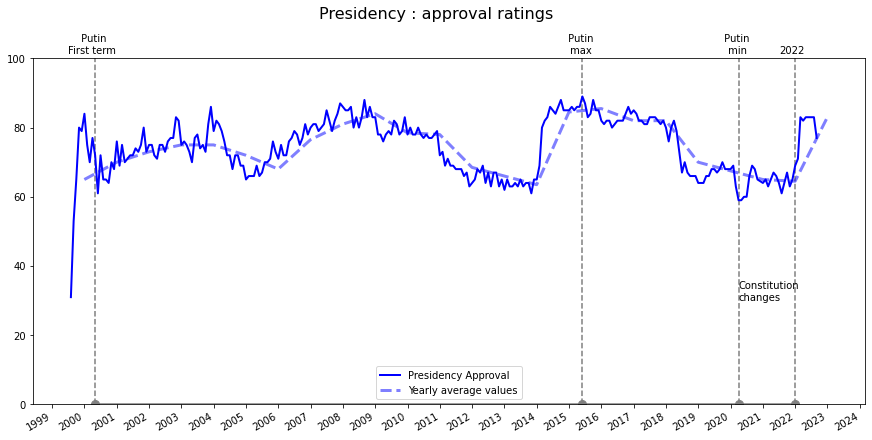

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)


plt.ylim(0,100, 20)

ax.plot(president_approval.date,president_approval['Approve'], linewidth=2,color='blue' )
ax.plot(means_p.date, means_p['Approve'], linewidth=3,alpha=0.5, linestyle='dashed', color='blue')

col = ['navy', 'blue', 'mediumblue', 'black','gray']

levels = np.tile([ 100, 100 , 100], int(np.ceil(len(key_dates)/3)))[:len(key_dates)]

ax.vlines(key_dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax.plot(key_dates, np.zeros_like(key_dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(key_dates, levels, text):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)


ax.axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=0.0)
ax.text(pd.Timestamp('2020-04-01'),y=30, s='Constitution\nchanges', horizontalalignment='left', color='black')


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


ax.legend(['Presidency Approval', 'Yearly average values'], loc='lower center')

fig.suptitle('Presidency : approval ratings', fontsize=16)

plt.savefig(str(new_dir)+ '/pres_approval_monthly_yearly.jpg')

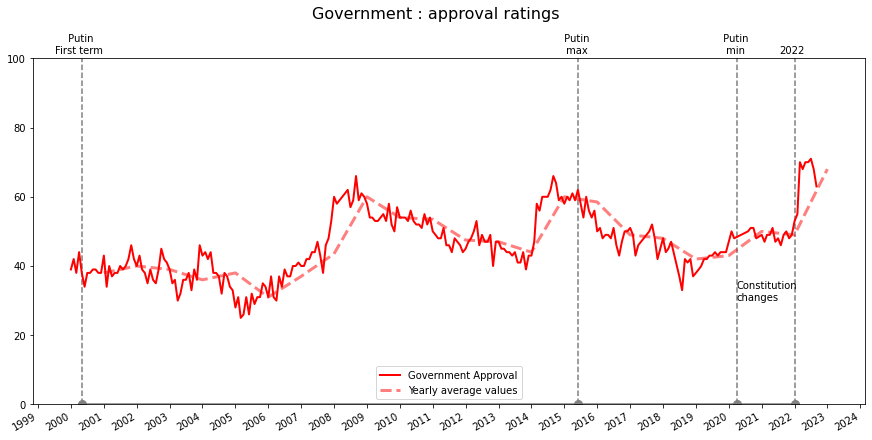

In [17]:
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)


plt.ylim(0,100, 20)

ax.plot(goverment_approval.date,goverment_approval['Approve'], linewidth=2,color='red' )
ax.plot(means_g.date, means_g['Approve'], linewidth=3,alpha=0.5, linestyle='dashed', color='red')

col = ['navy', 'blue', 'mediumblue', 'black','gray']

levels = np.tile([ 100, 100 , 100], int(np.ceil(len(key_dates)/3)))[:len(key_dates)]

ax.vlines(key_dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax.plot(key_dates, np.zeros_like(key_dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(key_dates, levels, text):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)


ax.axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=0.0)
ax.text(pd.Timestamp('2020-04-01'),y=30, s='Constitution\nchanges', horizontalalignment='left', color='black')


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


ax.legend(['Government Approval', 'Yearly average values'], loc='lower center')


fig.suptitle('Government : approval ratings', fontsize=16)

plt.savefig(str(new_dir)+ '/gov_approval_monthly-yearly.jpg')

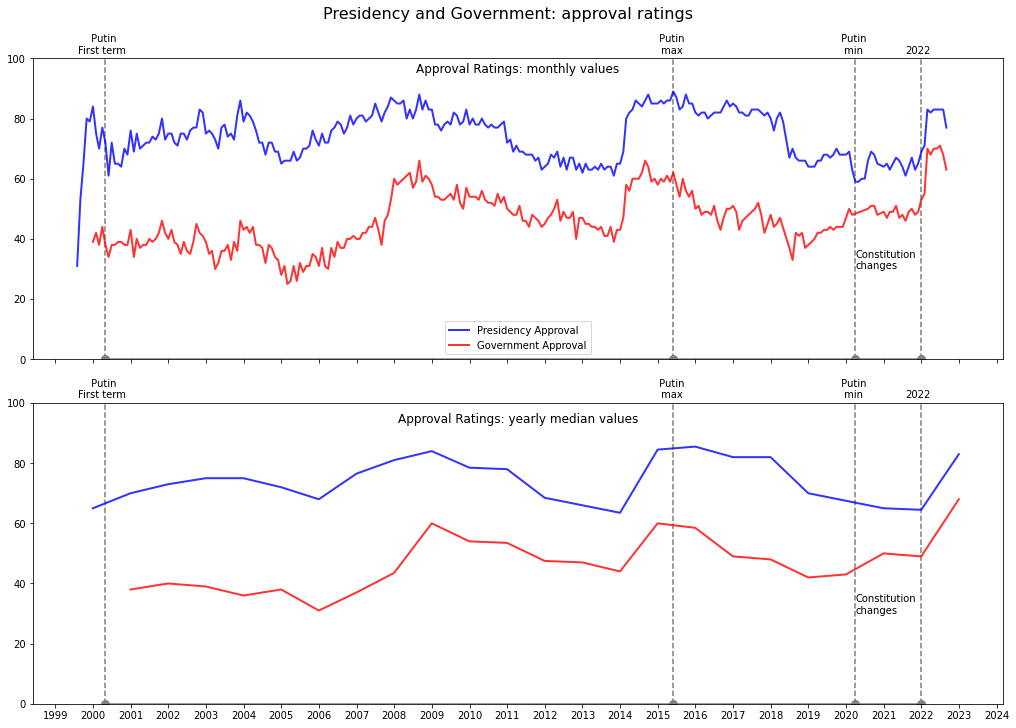

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(ncols=1, nrows =2, figsize=(14, 10), constrained_layout=True, sharey=True, sharex=True)


plt.ylim(0,100, 20)

ax[0].plot(president_approval.date,president_approval['Approve'], linewidth=2,alpha=0.8, color='blue' )
ax[0].plot(goverment_approval.date,goverment_approval['Approve'], linewidth=2,alpha=0.8, color='red' )

col = ['navy', 'blue', 'mediumblue', 'black','gray']


levels = np.tile([ 100, 100 , 100], int(np.ceil(len(key_dates)/3)))[:len(key_dates)]



ax[0].vlines(key_dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax[0].plot(key_dates, np.zeros_like(key_dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(key_dates, levels, text):
    ax[0].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)


ax[0].axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=0.0)
ax[0].text(pd.Timestamp('2020-04-01'),y=30, s='Constitution\nchanges', horizontalalignment='left', color='black')


ax[1].vlines(key_dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax[1].plot(key_dates, np.zeros_like(key_dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

for d1, l1, r1 in zip(key_dates, levels, text):
    ax[1].annotate(r1, xy=(d1, l1),
                xytext=(-3, np.sign(l1)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)


ax[1].axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=0.0)
ax[1].text(pd.Timestamp('2020-04-01'),y=30, s='Constitution\nchanges', horizontalalignment='left', color='black')



ax[1].plot(means_p.date, means_p['Approve'], linewidth=2,alpha=0.8, color='blue')
ax[1].plot(means_g.date, means_g['Approve'], linewidth=2,alpha=0.8, color='red')


ax[0].xaxis.set_major_locator(mdates.YearLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax[0].get_xticklabels(), rotation=30, ha="right")


ax[0].legend(['Presidency Approval', 'Government Approval'], loc='lower center')

ax[0].set_title('Approval Ratings: monthly values', y=1.0, pad=-14)


ax[1].set_title('Approval Ratings: yearly median values', y=0.98, pad=-14)
fig.suptitle('Presidency and Government: approval ratings', fontsize=16)

plt.savefig(str(new_dir)+ '/gov_pres_approval_ratings.jpg')


In [19]:
moving= pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Assessment of situation in the country.csv')
moving['date'] = pd.to_datetime(moving['date'].str.strip(), format='%Y-%m')

In [20]:
ssi = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Social Sentiment Index (SSI).csv')
ssi['date'] = pd.to_datetime(ssi['date'].str.strip(), format='%Y-%m')

In [21]:
means_moving = (moving.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()
means_ssi =(ssi.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()

In [22]:
moving.tail(6)

,date,In the right direction,On the wrong track,Difficult to answer
301,2022-04-01,66.0,24.0,10.0
302,2022-05-01,68.0,22.0,10.0
303,2022-06-01,68.0,22.0,9.0
304,2022-07-01,68.0,22.0,10.0
305,2022-08-01,67.0,24.0,9.0
306,2022-09-01,60.0,27.0,12.0


In [23]:
moving.sort_values(by='In the right direction', ascending=False).head(8)

,date,In the right direction,On the wrong track,Difficult to answer
300,2022-03-01,69.0,22.0,9.0
304,2022-07-01,68.0,22.0,10.0
303,2022-06-01,68.0,22.0,9.0
302,2022-05-01,68.0,22.0,10.0
305,2022-08-01,67.0,24.0,9.0
301,2022-04-01,66.0,24.0,10.0
210,2014-08-01,64.0,22.0,14.0
220,2015-06-01,64.0,22.0,14.0


In [24]:
ssi.sort_values(by='Social Sentiment Index', ascending=False).head(8)

,date,Social Sentiment Index
79,2008-03-01,100.0
80,2008-06-01,97.0
160,2022-07-01,96.0
81,2008-09-01,95.0
78,2008-01-01,95.0
159,2022-05-01,94.0
114,2014-06-01,90.0
158,2022-03-01,90.0


In [25]:
ssi[ssi['Social Sentiment Index']>=90]

,date,Social Sentiment Index
78,2008-01-01,95.0
79,2008-03-01,100.0
80,2008-06-01,97.0
81,2008-09-01,95.0
114,2014-06-01,90.0
158,2022-03-01,90.0
159,2022-05-01,94.0
160,2022-07-01,96.0


In [26]:
maxo = (ssi[ssi['Social Sentiment Index']==ssi['Social Sentiment Index'].max()])
maxo_2022 = (ssi[ssi['date']>'2022'].max()).T

In [27]:
dates = maxo['date'].to_list()
dates.append(maxo_2022[0])
dates.append(pd.Timestamp('2014-06-01'))

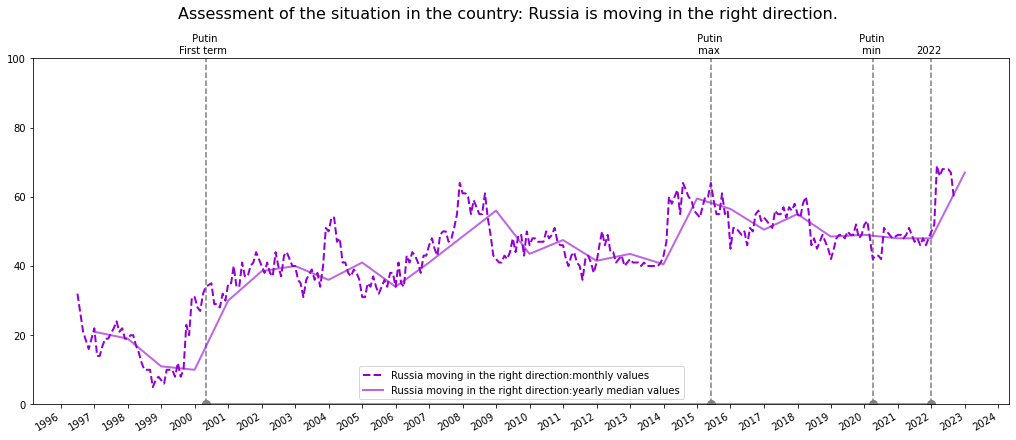

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 6), constrained_layout=True, sharey=True, sharex=True)

levels = np.tile([ 100, 100 , 100], int(np.ceil(len(key_dates)/3)))[:len(key_dates)]

plt.ylim(0,100, 20)

ax.vlines(key_dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax.plot(key_dates, np.zeros_like(key_dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(key_dates, levels, text):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
    
line_up, = ax.plot(moving.date,moving['In the right direction'], linewidth=2,label='Russia moving in the right direction:monthly values', linestyle='dashed', color='darkviolet' )
line_down, = ax.plot(means_moving.date,means_moving['In the right direction'], linewidth=2,label='Russia moving in the right direction:yearly median values',alpha=0.6, color='darkviolet' )


ax.legend(handles=[line_up, line_down],loc='lower center')


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

fig.suptitle('Assessment of the situation in the country: Russia is moving in the right direction.', fontsize=16)


plt.savefig(str(new_dir)+ '/russia_moving_right.jpg') #use this when running whole notebook


SSI METHODOLOGY:
All the questions used in calculating the SSI seek to bring out positive or negative perceptions (or a pattern of change in these perceptions) in order to sharpen the expressiveness of the indicator. The focus is on four elements:
respondents’ family current situation (sub index FI, 2 questions)
general economic and political situation in Russia (sub index RI, 3 questions)
Assessment of President and government (sub index PI, 2 questions)
Expectations for personal and country situation (sub index EI, 5 questions)
An individual index for each question is calculated as the difference between positive and negative answers, to which 100 is added to avoid negative values of the index. The aggregate SSI is calculated as the arithmetic mean of individual indices. Thus, the SSI varies in the range from 0 to 200, where values below 100 indicate the prevalence of negative appraisals among the public. (‘https://www.levada.ru/en/social-sentiment-index/)


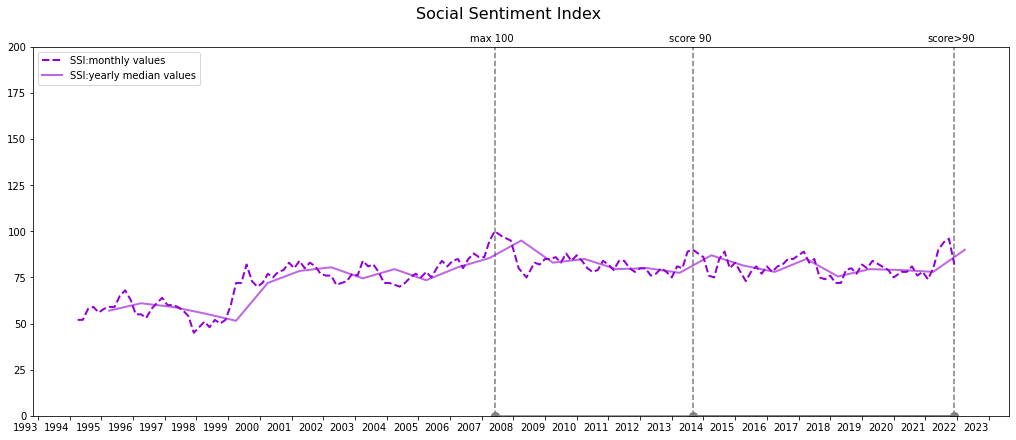

In [29]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 6), constrained_layout=True)

levels = np.tile([ 200, 200,], int(np.ceil(len(dates)/2)))[:len(dates)]

plt.ylim(0,200, 20)

texto = ['max 100', 'score>90', 'score 90']

ax.vlines(dates, 0, levels, color="tab:gray",linestyle='dashed' )  # The vertical stems.

ax.plot(dates, np.zeros_like(dates), "-o",
        color="gray", markerfacecolor="gray", markersize=8)  # Baseline and markers on it.

# annotate lines
for d,l, r in zip(dates,levels, texto):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom", wrap=True)
    
line_up, = ax.plot(ssi.date,ssi['Social Sentiment Index'], linewidth=2,label='SSI:monthly values', linestyle='dashed', color='darkviolet' )
line_down, = ax.plot(means_ssi.date,means_ssi['Social Sentiment Index'], linewidth=2,label='SSI:yearly median values',alpha=0.6, color='darkviolet' )

ax.legend(handles=[line_up, line_down],loc='upper left')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="right")

fig.suptitle('Social Sentiment Index', fontsize=16)

#plt.savefig(str(new_dir)+ '/social_sentiment.jpg')
#temp save
plt.savefig(str(new_dir)+'/social_sentiment_scored.jpg')

"On 9 August 1999, Putin was appointed one of three first deputy prime ministers, and later on that day, was appointed acting prime minister of the Government of the Russian Federation by President Yeltsin.[75] Yeltsin also announced that he wanted to see Putin as his successor. Later on that same day, Putin agreed to run for the presidency."
source: https://en.wikipedia.org/wiki/Vladimir_Putin

In [30]:
import pandas as pd

ruble=  pd.read_csv('/content/drive/MyDrive/RUSSdata/Fred_data/'+date_work+'/CCUSMA02RUM618N.csv')
ruble =ruble.rename(columns={'CCUSMA02RUM618N': '1_ruble_to_dollar'})
ruble['date'] = pd.to_datetime(ruble['date'])

In [31]:
rubble_short= ruble[ruble['date']>'2012']
rubble_short.head(3)

,date,1_ruble_to_dollar
236,2012-02-01,0.033465
237,2012-03-01,0.034018
238,2012-04-01,0.037841


In [32]:
inflation =  pd.read_csv('/content/drive/MyDrive/RUSSdata/Russ_Stat_Office/'+date_work+'/inflation_russia.csv')
infl=inflation.iloc[:, :-1]

In [33]:
infl = infl.set_index('Year')

In [34]:
infl_m= infl.stack().reset_index()

In [35]:
infl_m.tail(3)

,Year,level_1,0
366,1992,Nov,2235.88
367,1992,Dec,2508.85
368,1991,Dec,160.40


In [36]:
infl_m['date'] = pd.to_datetime(infl_m.Year.astype(str)+'-'+ infl_m.level_1.astype(str))


In [37]:
infl_m =infl_m.sort_values(by='date')

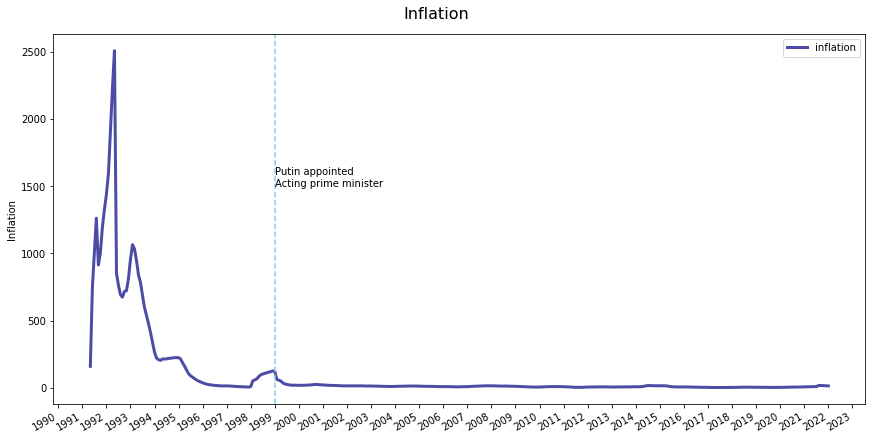

In [38]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
ax.plot(infl_m.date, infl_m[0], linewidth=3, color='navy',alpha=0.7)


ax.axvline(pd.Timestamp('1999-08-09'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('1999-08-09'),y=1500, s='Putin appointed\nActing prime minister ', horizontalalignment='left', color='black')

# format xaxis with 12 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.set_ylabel('Inflation')

ax.legend(['inflation'])
fig.suptitle('Inflation', fontsize=16)
plt.savefig(str(new_dir)+ '/inflation.jpg')

In [39]:
inflation_short= infl_m[infl_m['date']>'2012']

In [40]:
inflation_short= inflation_short.sort_values(by='date')

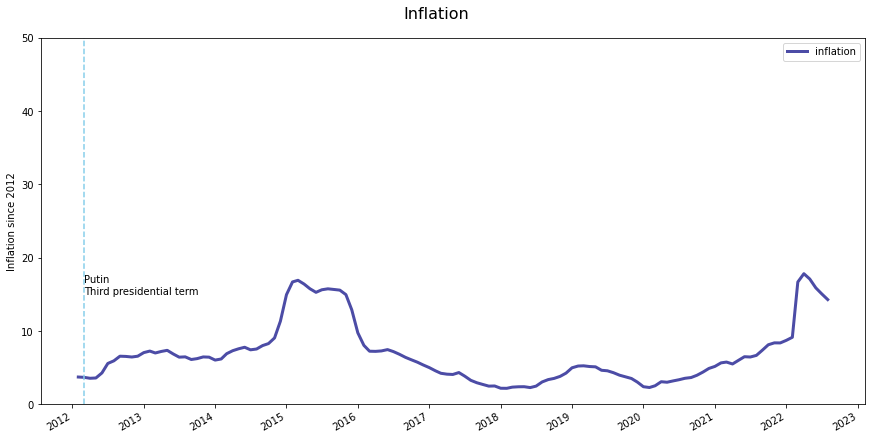

In [41]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
plt.ylim(0,50, 5)

ax.plot(inflation_short.date, inflation_short[0], linewidth=3, color='navy',alpha=0.7)

ax.axvline(pd.Timestamp('2012-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2012-03-03'),y=15, s='Putin\nThird presidential term', horizontalalignment='left', color='black')

# format xaxis with 12 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.set_ylabel('Inflation since 2012')

ax.legend(['inflation'])
fig.suptitle('Inflation', fontsize=16)
plt.savefig(str(new_dir)+ '/inflation_from_2012.jpg')

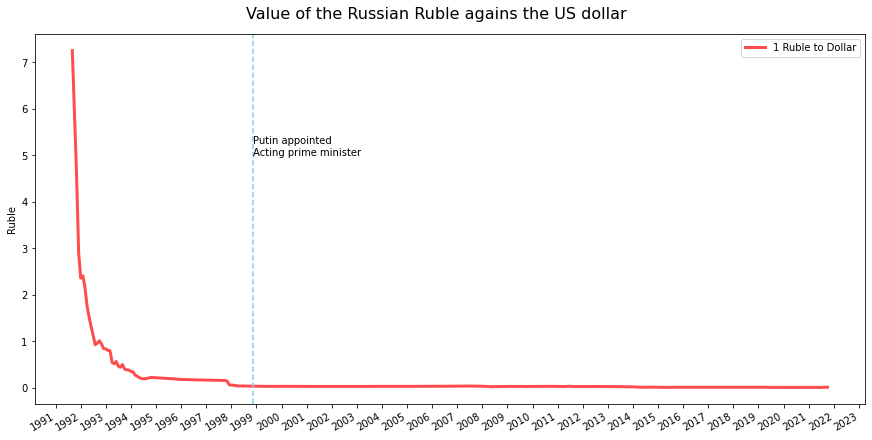

In [42]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

ruble['date']= pd.to_datetime(ruble['date'])
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
ax.plot(ruble.date, ruble['1_ruble_to_dollar'], linewidth=3, color='red',alpha=0.7)

ax.axvline(pd.Timestamp('1999-08-09'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('1999-08-09'),y=5, s='Putin appointed\nActing prime minister ', horizontalalignment='left', color='black')

# format xaxis with 12 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.set_ylabel('Ruble')

ax.legend(['1 Ruble to Dollar'])
fig.suptitle('Value of the Russian Ruble agains the US dollar', fontsize=16)
plt.savefig(str(new_dir)+ '/ruble_dollar.jpg')

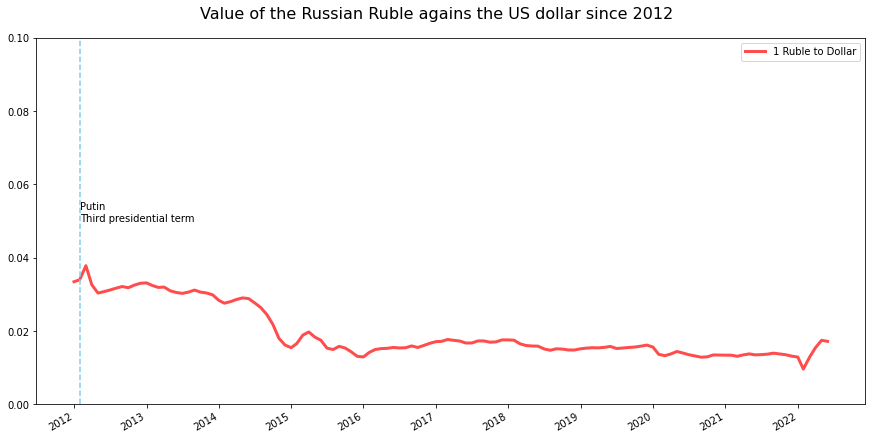

In [43]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
plt.ylim(0,0.1, 0.01)

ax.plot(rubble_short.date, rubble_short['1_ruble_to_dollar'], linewidth=3, color='red',alpha=0.7)

ax.axvline(pd.Timestamp('2012-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2012-03-03'),y=.05, s='Putin\nThird presidential term', horizontalalignment='left', color='black')

# format xaxis with 12 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.legend(['1 Ruble to Dollar'])
fig.suptitle('Value of the Russian Ruble agains the US dollar since 2012', fontsize=16)
plt.savefig(str(new_dir)+ '/ruble_dollar_from_2012.jpg')

In [44]:
#unemploymentfrom 2014
import pandas as pd
unemp = pd.read_csv('/content/drive/MyDrive/RUSSdata/Russ_Stat_Office/yearly_unemployment.csv', sep=',')
unemp['date'] = pd.to_datetime(unemp['Year'].astype(str).str.strip(), format='%Y')

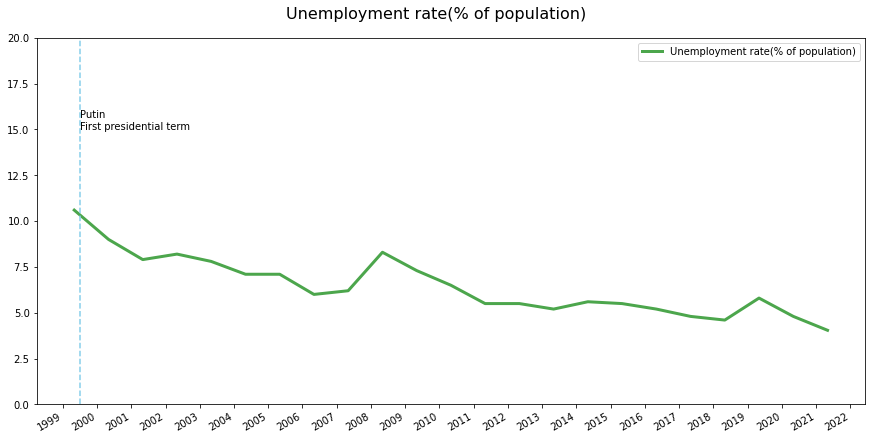

In [45]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
plt.ylim(0,20, 1)

ax.plot(unemp.date, unemp['Unemployment rate(% of population)'], linewidth=3, color='green',alpha=0.7)

ax.axvline(pd.Timestamp('2000-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2000-03-03'),y=15, s='Putin\nFirst presidential term', horizontalalignment='left', color='black')

# format xaxis with 12 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.legend(['Unemployment rate(% of population)'])
fig.suptitle('Unemployment rate(% of population)', fontsize=16)
plt.savefig(str(new_dir)+ '/unemploymnet_rate.jpg')

In [46]:
wb_data = pd.read_csv('/content/drive/MyDrive/RUSSdata/World_Bank/'+date_work+'/w_bank_data.csv')
wb_data['index'] = pd.to_datetime(wb_data['index'].astype(str), format='%Y')
wb_data_short=wb_data[wb_data['index']>'1999']

wb_data_short.tail()

,index,SH.ALC.PCAP.LI,SH.XPD.GHED.PP.CD,SI.POV.GINI,SI.POV.NAHC,VC.IHR.PSRC.P5
26,2016-01-01,NaN,733.856093,36.8,13.3,10.919951
27,2017-01-01,NaN,802.782614,37.2,13.2,9.134193
28,2018-01-01,11.19,933.931437,37.5,12.6,8.209476
29,2019-01-01,NaN,1042.052878,37.7,12.3,7.679322
30,2020-01-01,NaN,NaN,36.0,12.1,7.330003


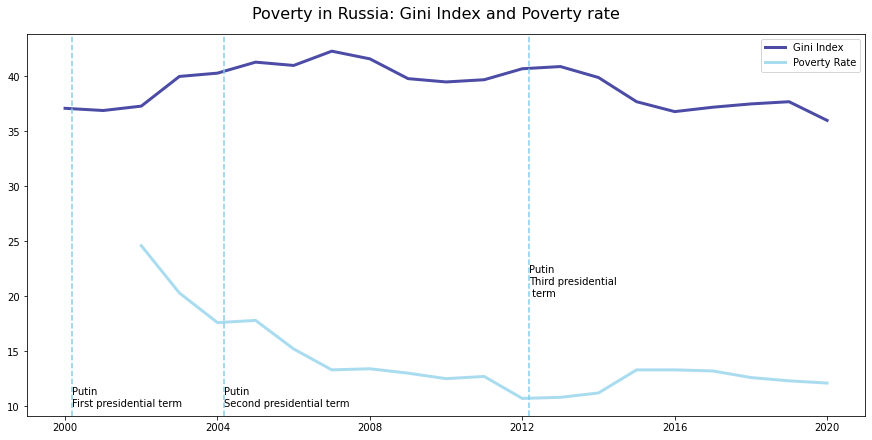

In [47]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

ax.plot(wb_data_short['index'], wb_data_short['SI.POV.GINI'], linewidth=3, color='navy',alpha=0.7)
ax.plot(wb_data_short['index'], wb_data_short['SI.POV.NAHC'],linewidth=3, color='skyblue',alpha=0.7 )

ax.axvline(pd.Timestamp('2000-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2000-03-03'),y=10, s='Putin\nFirst presidential term', horizontalalignment='left', color='black')


ax.axvline(pd.Timestamp('2004-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2004-03-03'),y=10, s='Putin\nSecond presidential term', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2012-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2012-03-03'),y=20, s='Putin\nThird presidential\n term', horizontalalignment='left', color='black')


ax.legend(['Gini Index','Poverty Rate'])
fig.suptitle('Poverty in Russia: Gini Index and Poverty rate', fontsize=16)
plt.savefig(str(new_dir)+ '/poverty_rate_and_gini.jpg')

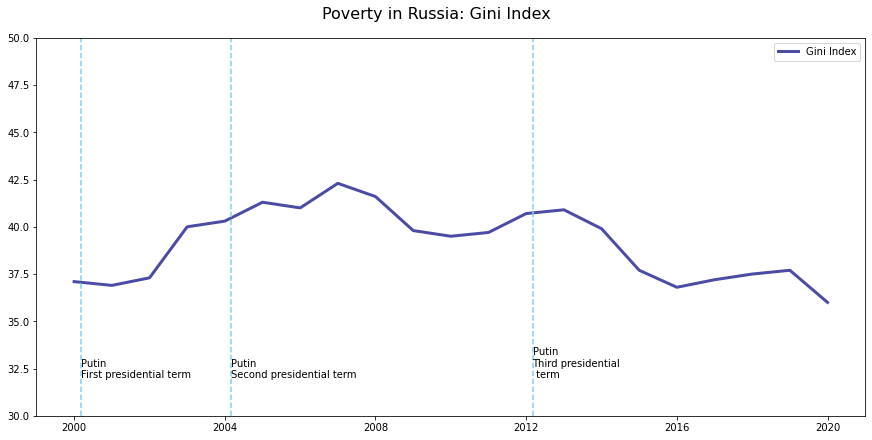

In [48]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
plt.ylim(30,50, 1)
ax.plot(wb_data_short['index'], wb_data_short['SI.POV.GINI'], linewidth=3, color='navy',alpha=0.7)


ax.axvline(pd.Timestamp('2000-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2000-03-03'),y=32, s='Putin\nFirst presidential term', horizontalalignment='left', color='black')


ax.axvline(pd.Timestamp('2004-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2004-03-03'),y=32, s='Putin\nSecond presidential term', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2012-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2012-03-03'),y=32, s='Putin\nThird presidential\n term', horizontalalignment='left', color='black')


ax.legend(['Gini Index'])
fig.suptitle('Poverty in Russia: Gini Index', fontsize=16)
plt.savefig(str(new_dir)+ '/poverty_GINI.jpg')

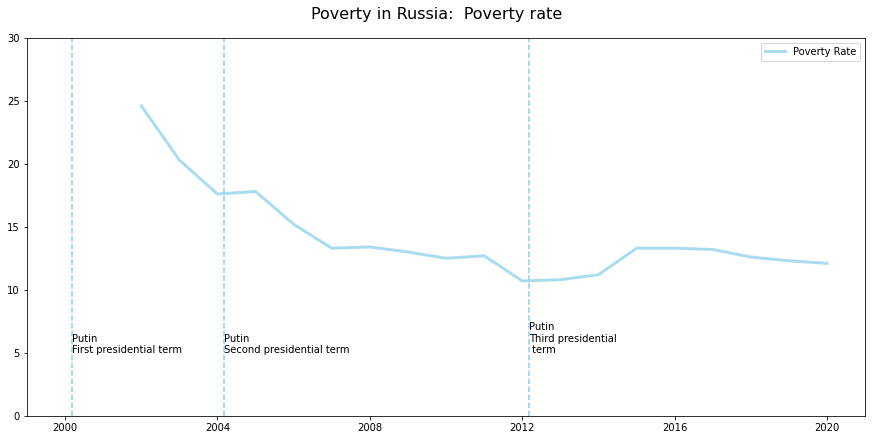

In [49]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
plt.ylim(0,30, 1)

ax.plot(wb_data_short['index'], wb_data_short['SI.POV.NAHC'],linewidth=3, color='skyblue',alpha=0.7 )

ax.axvline(pd.Timestamp('2000-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2000-03-03'),y=5, s='Putin\nFirst presidential term', horizontalalignment='left', color='black')


ax.axvline(pd.Timestamp('2004-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2004-03-03'),y=5, s='Putin\nSecond presidential term', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2012-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2012-03-03'),y=5, s='Putin\nThird presidential\n term', horizontalalignment='left', color='black')


ax.legend(['Poverty Rate'])
fig.suptitle('Poverty in Russia:  Poverty rate', fontsize=16)
plt.savefig(str(new_dir)+ '/poverty_rate.jpg')

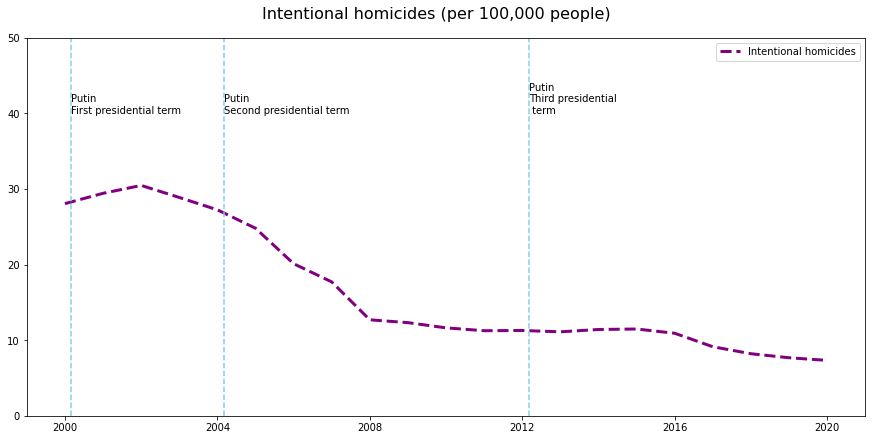

In [50]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
plt.ylim(0,50, 10)

ax.plot(wb_data_short['index'], wb_data_short['VC.IHR.PSRC.P5'],linewidth=3,linestyle ='dashed', color='purple')

ax.axvline(pd.Timestamp('2000-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2000-03-03'),y=40, s='Putin\nFirst presidential term', horizontalalignment='left', color='black')


ax.axvline(pd.Timestamp('2004-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2004-03-03'),y=40, s='Putin\nSecond presidential term', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2012-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2012-03-03'),y=40, s='Putin\nThird presidential\n term', horizontalalignment='left', color='black')

ax.legend(['Intentional homicides'])
fig.suptitle('Intentional homicides (per 100,000 people)', fontsize=16)
plt.savefig(str(new_dir)+ '/homicide.jpg')

In [51]:
alch = wb_data_short.dropna()
alch['year']=alch['index'].astype(str).str[:4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


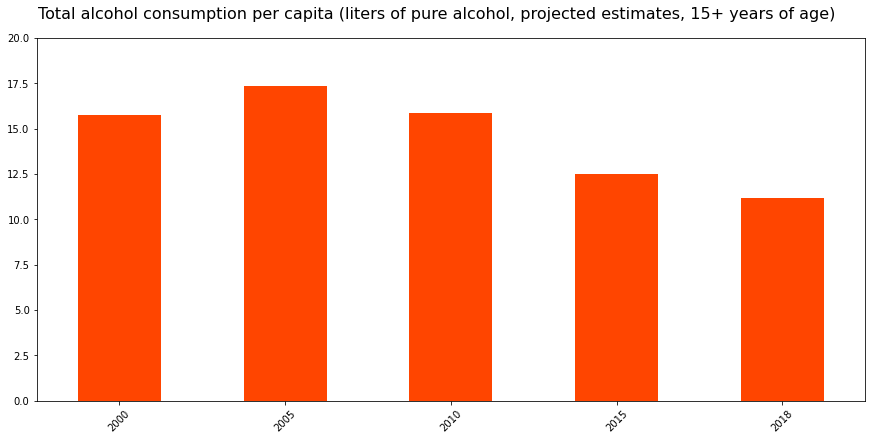

In [52]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)



fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)


plt.ylim(0,20, 5)

alch['SH.ALC.PCAP.LI'].plot.bar( width=.5,color=('orangered'), ax=ax,)

ax.set_xticklabels(alch.year,  rotation=45)
fig.suptitle ( 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', fontsize=16)
plt.savefig(str(new_dir)+ '/alcohol.jpg')

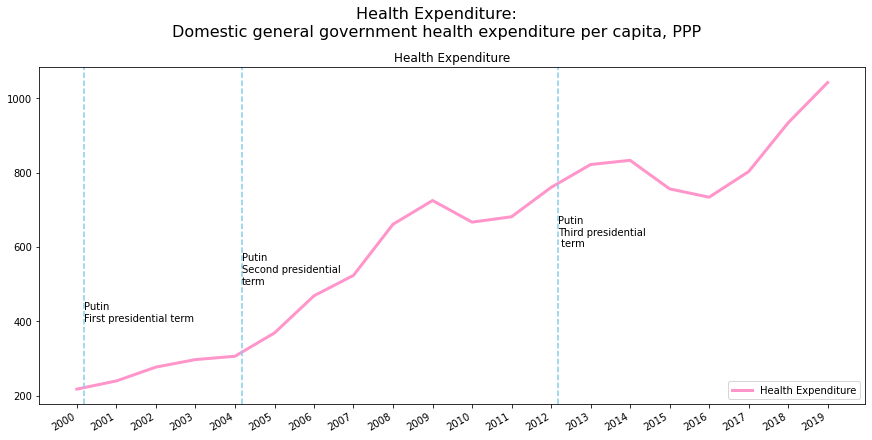

In [53]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

ax.plot(wb_data['index'], wb_data['SH.XPD.GHED.PP.CD'],linewidth=3, color='hotpink',alpha=0.7)

ax.axvline(pd.Timestamp('2000-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2000-03-03'),y=400, s='Putin\nFirst presidential term', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2004-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2004-03-03'),y=500, s='Putin\nSecond presidential\nterm', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2012-03-03'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2012-03-03'),y=600, s='Putin\nThird presidential\n term', horizontalalignment='left', color='black')

ax.legend(['Health Expenditure',])

ax.title.set_text('Health Expenditure')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


fig.suptitle('Health Expenditure:\nDomestic general government health expenditure per capita, PPP', fontsize=16)

plt.savefig(str(new_dir)+ '/health_expanditure.jpg')

VC.IHR.PSRC.P5 :Intentional homicides (per 100,000 people)

In [54]:
hom = wb_data[['index', 'VC.IHR.PSRC.P5']]
hom.columns = ['year', 'Intentional homicides (per 100,000 people)' ]

In [55]:
wiki_journalists = pd.read_csv('/content/drive/MyDrive/RUSSdata/wiki/'+date_work+'/journalists_death.csv')
wiki_journalists['year'] = pd.to_datetime(wiki_journalists['year'].astype(str).str.strip(), format='%Y')


In [56]:
wiki_journalists['scaled'] = wiki_journalists['event_occurances']/wiki_journalists['event_occurances'].max()

In [57]:
wiki_journalists.tail()

,year,event_occurances,scaled
21,2014-01-01,1,0.05
22,2016-01-01,1,0.05
23,2017-01-01,4,0.20
24,2018-01-01,5,0.25
25,2022-01-01,3,0.15


In [58]:
combo = pd.merge(hom, wiki_journalists, on='year', how='outer')

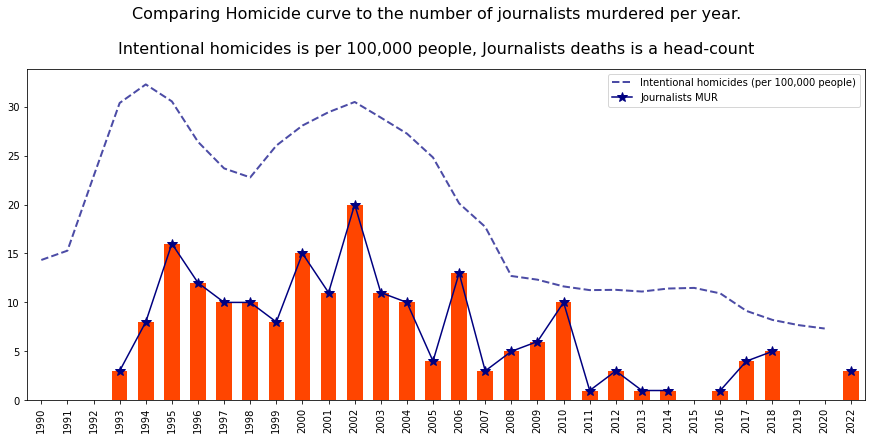

In [59]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.dates as mdates

combo['year']=combo['year'].astype(str).str[:4]

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,) 
combo['Intentional homicides (per 100,000 people)'].plot(linestyle='dashed', linewidth=2, color='navy',alpha=0.7)
combo['event_occurances'].plot.bar( width=.6,color=('orangered'), ax=ax)
combo['event_occurances'].plot(kind='line', marker='*', color='navy', ms=10)
ax.legend(['Intentional homicides (per 100,000 people)', 'Journalists MUR'])

ax.set_xticklabels(combo.year,  rotation=90)
fig.suptitle ( 'Comparing Homicide curve to the number of journalists murdered per year.\n\nIntentional homicides is per 100,000 people, Journalists deaths is a head-count', fontsize=16)

plt.savefig(str(new_dir)+ '/journalist_MUR.jpg')

In [60]:
terror = pd.read_csv('/content/drive/MyDrive/RUSSdata/wiki/'+date_work+'/terror_incidents.csv')
terror['datetime'] = pd.to_datetime(terror['datetime'].str.strip(), format='%Y-%m')

In [61]:
conflict = pd.read_csv('/content/drive/MyDrive/RUSSdata/wiki/'+date_work+'/conflicts_russian_federation.csv')
conflict['datetime'] = pd.to_datetime(conflict['datetime'].str.strip(), format='%Y-%m')

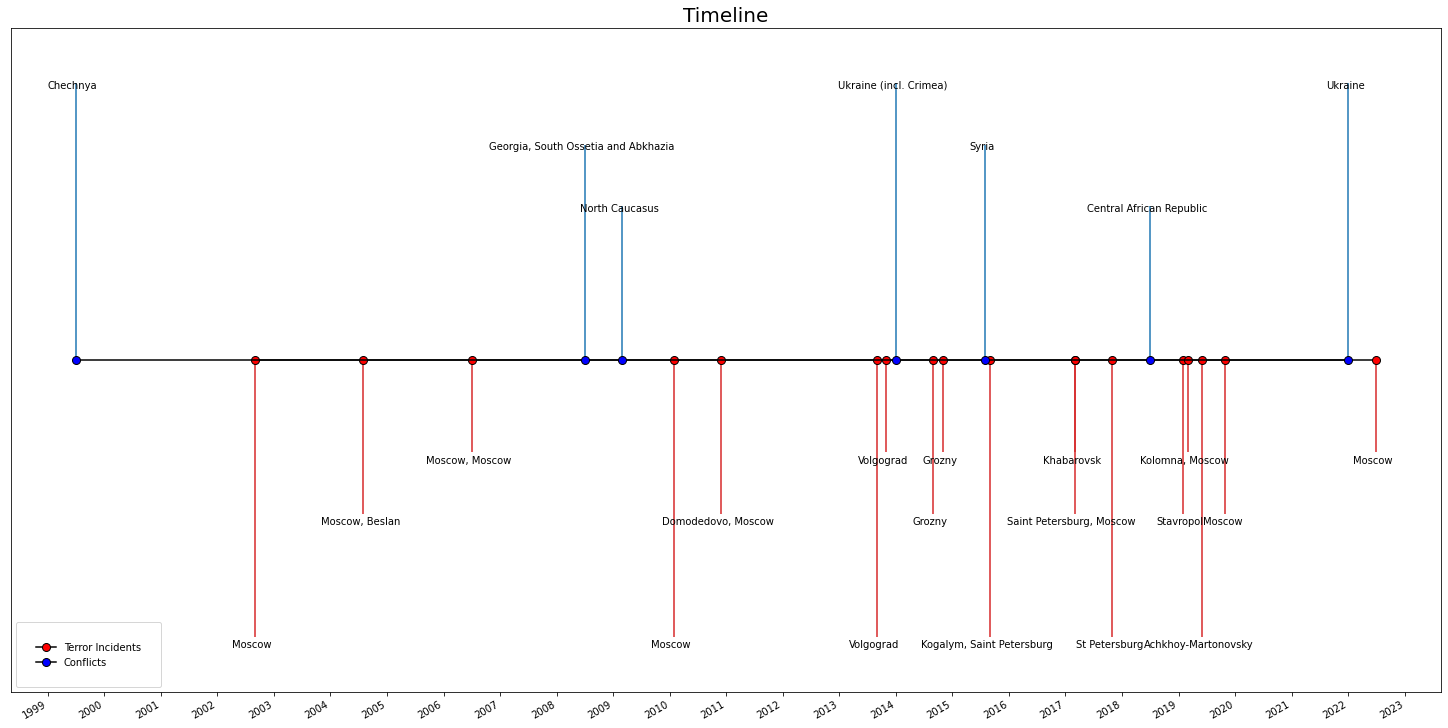

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

names = terror['city_name_mapped'].to_list()
conflicts = conflict['Location'].to_list()
#conf_date = conf_short['Start_Date']
conf_date = [datetime.strptime(d, "%Y-%m-%d") for d in conflict['datetime'].astype(str)]
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in terror['datetime'].astype(str)]
# Choose some nice levels
levels = np.tile([ 9 , 7 , 5],
                 int(np.ceil(len(dates)/3)))[:len(conf_date )]
levels_neg = np.tile([ -9 , -5 , -3],
                 int(np.ceil(len(dates)/3)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 10), constrained_layout=True, sharey=True,)
#ax.set(title="Timeline",fontsize=16 )
plt.title('Timeline', fontsize=20)

ax.vlines(dates, 0, levels_neg, color="tab:red", )  # The vertical stems.
ax.vlines(conf_date, 0, levels, color="tab:blue")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="red", markersize=8)  # Baseline and markers on it.
ax.plot(conf_date, np.zeros_like(conf_date), "-o",
        color="k", markerfacecolor="blue", markersize=8)

# annotate lines
for d, l, r in zip(dates, levels_neg, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top", wrap=True)
for dc, l, c in zip(conf_date, levels, conflicts):
    ax.annotate(c, xy=(dc, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="top", wrap=True)

# format xaxis with 12 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.margins(y=0.1)
ax.legend(['Terror Incidents', 'Conflicts'],borderpad=2, loc =3)
plt.savefig(str(new_dir)+ '/time_line.jpg')


In [63]:
terror_grouped = (terror.groupby(pd.Grouper(key='datetime', axis=0, freq='Y')).sum()).reset_index()
terror_grouped['arb_val_terror' ] = terror_grouped['arb_val_terror' ] /80
terror_grouped= terror_grouped[['datetime','arb_val_terror' ]]

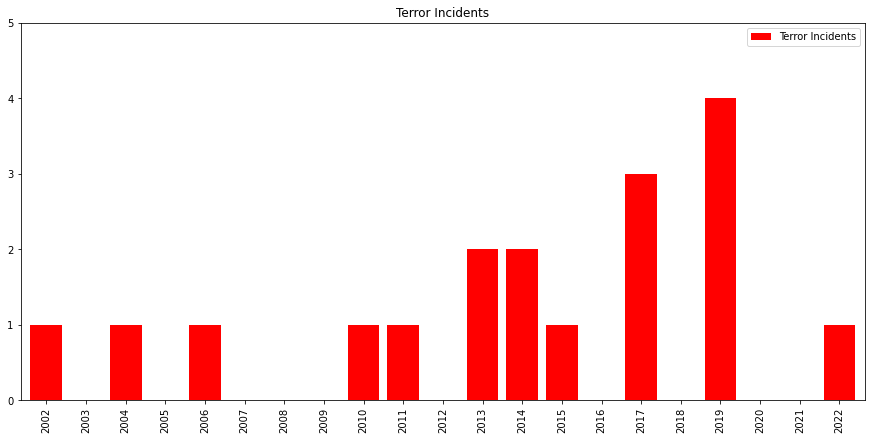

In [64]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.dates as mdates

terror_grouped['year'] = (terror_grouped.datetime.astype(str).str[:4]).astype(int)
 
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)
plt.ylim(0,5, 1)

terror_grouped['arb_val_terror' ].plot.bar( width=.8,color=('red'), ax=ax)

ax.legend(['Terror Incidents'])

ax.set_xticklabels(terror_grouped.year, rotation=90)
plt.title('Terror Incidents')
plt.savefig(str(new_dir)+ '/terror_Incidents.jpg')

In [65]:
# measures taken to manage the flow/access of information
import pandas as pd
cens =  pd.read_csv('/content/drive/MyDrive/RUSSdata/wiki/'+date_work+'/censorship_plus.csv')
cens['datetime'] = pd.to_datetime(cens['datetime'].str.strip(), format='%Y-%m')


In [66]:
cens_grouped = (cens.groupby(pd.Grouper(key='datetime', axis=0, freq='Y')).sum()).reset_index()

In [67]:
cens_grouped['year_short'] = (cens_grouped['datetime'].astype(str).str[:4]).astype(int)

In [68]:
interval_min = 1
interval_max = 95
cens_grouped['censor_score_scaled'] = (cens_grouped['censor_score'] - cens_grouped['censor_score'].min()) / (cens_grouped['censor_score'].max() - cens_grouped['censor_score'].min() ) * (interval_max - interval_min) + interval_min

In [69]:
cens_grouped['cum_sum'] = cens_grouped['censor_score'].cumsum()

In [70]:
cens_grouped['arb_score_cumsum_scaled'] = (cens_grouped['cum_sum'] - cens_grouped['cum_sum'].min()) / (cens_grouped['cum_sum'].max() - cens_grouped['cum_sum'].min() ) * (interval_max - interval_min) + interval_min

In [71]:
#scaling columns for graphing:

a = cens_grouped['event_occurances'].min()
b = cens_grouped['event_occurances'].max()
cens_grouped['cum_sum_scale'] = (cens_grouped['cum_sum'] - cens_grouped['cum_sum'].min()) / (cens_grouped['cum_sum'].max() - cens_grouped['cum_sum'].min() ) * (b - a) + a


In [72]:
select_cens_grouped = cens_grouped[['datetime','event_occurances','arbitrary_score', 'censor_score']]
year = select_cens_grouped['datetime']
select_cens_grouped.drop(columns=['datetime'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [73]:
select_cens_grouped = (select_cens_grouped -select_cens_grouped .min())/(select_cens_grouped.max()-select_cens_grouped .min())

In [74]:
select_cens_grouped['cumsum'] = select_cens_grouped['censor_score'].cumsum()

In [75]:
select_cens_grouped['year']= year
select_cens_grouped.head()

,event_occurances,arbitrary_score,censor_score,cumsum,year
0,0.16,0.095652,0.001868,0.001868,2000-12-31
1,0.00,0.000000,0.000000,0.001868,2001-12-31
2,0.00,0.000000,0.000000,0.001868,2002-12-31
3,0.12,0.017391,0.002035,0.003903,2003-12-31
4,0.00,0.000000,0.000000,0.003903,2004-12-31


In [76]:
cens_grouped.head()

,datetime,event_occurances,arbitrary_score,count_words,count_word2,censor_score,year_short,censor_score_scaled,cum_sum,arb_score_cumsum_scaled,cum_sum_scale
0,2000-12-31,4,1.1,1,0,1.00000,2000,1.175575,1.00000,1.000000,0.000000
1,2001-12-31,0,0.0,0,0,0.00000,2001,1.000000,1.00000,1.000000,0.000000
2,2002-12-31,0,0.0,0,0,0.00000,2002,1.000000,1.00000,1.000000,0.000000
3,2003-12-31,3,0.2,0,0,1.08968,2003,1.191321,2.08968,1.036382,0.009676
4,2004-12-31,0,0.0,0,0,0.00000,2004,1.000000,2.08968,1.036382,0.009676


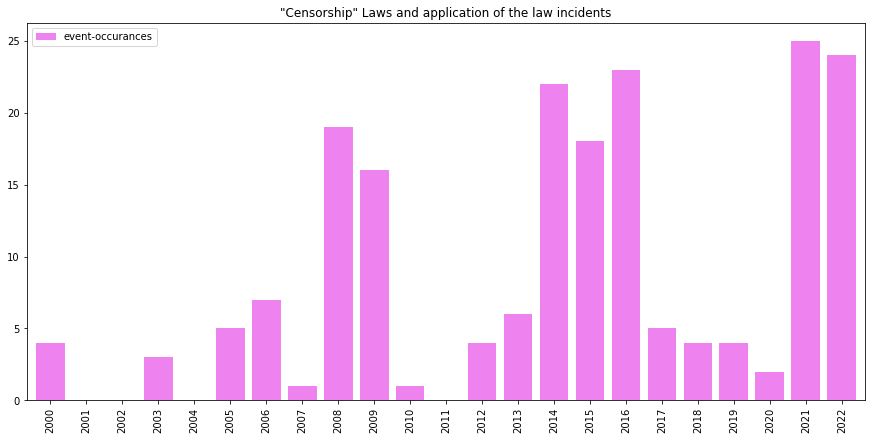

In [77]:
#SPLIT BARS AND LINE

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

cens_grouped['event_occurances' ].plot.bar( width=.8,color=('violet'), ax=ax)

ax.set_xticklabels(cens_grouped.year_short, rotation=90)

plt.legend(['event-occurances'])
plt.title('"Censorship" Laws and application of the law incidents')
plt.savefig(str(new_dir)+ '/censorship_events.jpg')

In [78]:
cens_limit = cens_grouped[['datetime', 'event_occurances', ]]

In [79]:
short_conflict = conflict[conflict['datetime']>'2000']
short_conflict= (short_conflict.groupby(pd.Grouper(key='datetime', axis=0, freq='Y')).sum()).reset_index()
short_conflict=short_conflict[['datetime', 'arb_val_war']]
short_conflict

,datetime,arb_val_war
0,2008-12-31,100
1,2009-12-31,100
2,2010-12-31,0
3,2011-12-31,0
4,2012-12-31,0
5,2013-12-31,0
6,2014-12-31,100
7,2015-12-31,100
8,2016-12-31,0
9,2017-12-31,0


In [80]:
short_conflict.loc[short_conflict['arb_val_war'] == 100, 'arb_val_war'] = 25

In [81]:
short_conflict.head()

,datetime,arb_val_war
0,2008-12-31,25
1,2009-12-31,25
2,2010-12-31,0
3,2011-12-31,0
4,2012-12-31,0


In [82]:
cens_terror = pd.merge(cens_limit, terror_grouped, on='datetime', how='outer')
cens_terror= pd.merge(cens_terror, short_conflict, on='datetime', how='outer')
cens_terror.tail()

,datetime,event_occurances,arb_val_terror,year,arb_val_war
18,2018-12-31,4,0.0,2018.0,25.0
19,2019-12-31,4,4.0,2019.0,0.0
20,2020-12-31,2,0.0,2020.0,0.0
21,2021-12-31,25,0.0,2021.0,0.0
22,2022-12-31,24,1.0,2022.0,25.0


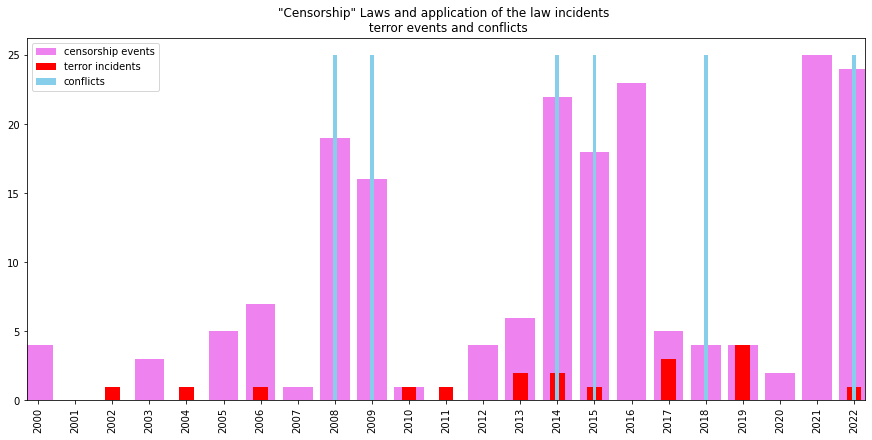

In [83]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

cens_terror['year'] = (cens_terror.datetime.astype(str).str[:4]).astype(int)
fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

cens_terror['event_occurances' ].plot.bar( width=.8,color=('violet'), ax=ax)
cens_terror['arb_val_terror' ].plot.bar( width=.4,color=('red'), ax=ax)
cens_terror['arb_val_war'].plot.bar( width=.1,color=('skyblue'), ax=ax)



ax.set_xticklabels(cens_terror.year, rotation=90)

plt.legend(['censorship events', 'terror incidents','conflicts'])
plt.title('"Censorship" Laws and application of the law incidents \n terror events and conflicts')

plt.savefig(str(new_dir)+ '/censorship_and_terror_events1.jpg')

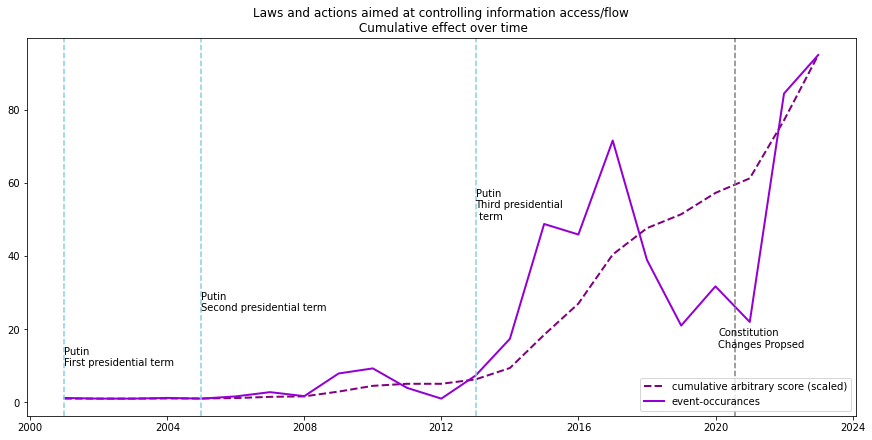

In [84]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)


ax.plot(cens_grouped.datetime, cens_grouped['arb_score_cumsum_scaled'], linestyle ='dashed',linewidth = 2, color='purple') 

ax.plot(cens_grouped.datetime, cens_grouped['censor_score_scaled' ], linewidth = 2, color='darkviolet',)	


ax.axvline(pd.Timestamp('2000-12-30'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2000-12-30'),y=10, s='Putin\nFirst presidential term', horizontalalignment='left', color='black')


ax.axvline(pd.Timestamp('2004-12-30'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2004-12-30'),y=25, s='Putin\nSecond presidential term', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2012-12-30'),linestyle='dashed', alpha=1, color='skyblue')
ax.text(pd.Timestamp('2012-12-30'),y=50, s='Putin\nThird presidential\n term', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2020-07-30'),linestyle='dashed', alpha=1, color='gray')
ax.text(pd.Timestamp('2020-01-30'),y=15, s='Constitution\nChanges Propsed', horizontalalignment='left', color='black')


plt.legend(['cumulative arbitrary score (scaled)','event-occurances',  ])
plt.title('Laws and actions aimed at controlling information access/flow\n Cumulative effect over time')
plt.savefig(str(new_dir)+ '/censorship_events_line_cumulative_effect.jpg')

In [85]:
linko_df = '/content/drive/MyDrive/RUSSdata/Fred_data/'
fred_info=[linko_df+date_work+'/CCUSMA02RUM618N.csv', linko_df+date_work+'/DCOILBRENTEU.csv',linko_df+date_work+'/PNGASEUUSDM.csv',
           linko_df+date_work+'/PWHEAMTUSDM.csv']

In [86]:
df_list=[]
for item in fred_info:
  df = pd.read_csv(item)
  df['date'] = pd.to_datetime(df['date'].str.strip(), format='%Y-%m')
  df_grouped = (df.groupby(pd.Grouper(key='date', axis=0, freq='Y')).mean()).reset_index()
  df_list.append(df_grouped )


In [87]:
fred_all = [df.set_index(['date']) for df in df_list]
fred_results = pd.concat(fred_all, axis=1).reset_index()

In [88]:
fred_1999 = fred_results[fred_results['date']>'1999']


In [89]:
fred_1999.columns

Index(['date', 'CCUSMA02RUM618N', 'DCOILBRENTEU', 'PNGASEUUSDM',
       'PWHEAMTUSDM'],
      dtype='object')

In [90]:
d_names = {'CCUSMA02RUM618N': 'ruble',
 'DCOILBRENTEU': 'oil_eu',
 'PNGASEUUSDM': 'natural_gas_eu',
 'PWHEAMTUSDM': 'wheat'}

In [91]:
fred_1999 = fred_1999.rename(columns=d_names)

In [92]:
fred_1999.head()

,date,ruble,oil_eu,natural_gas_eu,wheat
19,1999-12-31,0.040727,17.901566,1.806944,98.260947
20,2000-12-31,0.035555,28.660672,3.453889,100.739016
21,2001-12-31,0.034293,24.455720,3.873214,106.372979
22,2002-12-31,0.031905,24.993255,2.666335,132.167460
23,2003-12-31,0.032599,28.850814,3.486327,131.918755


In [93]:
# LOG for graph
fred_1999_time =fred_1999['date'].to_list()
fred_1999_data= fred_1999.iloc[:, 1:]
fred_1999_data  =np.log(fred_1999_data )
fred_1999_data['date']= fred_1999_time

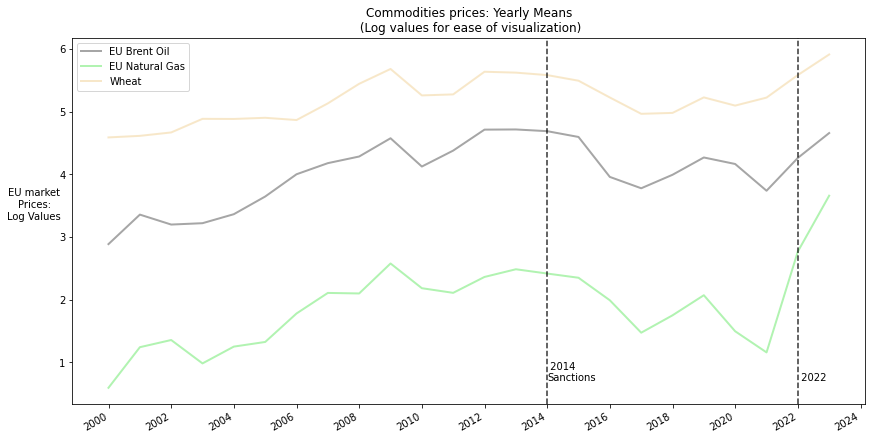

In [94]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6), constrained_layout=True,)

ax.plot(fred_1999_data.date, fred_1999_data['oil_eu'], linewidth=2,alpha=0.7, color='gray')
ax.plot(fred_1999_data.date, fred_1999_data['natural_gas_eu'],  linewidth=2,alpha=0.7, color='lightgreen')
ax.plot(fred_1999_data.date, fred_1999_data['wheat'], linewidth=2,alpha=0.7, color='wheat')

ax.axvline(pd.Timestamp('2014'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2014'), y=0.70, s=' 2014\nSanctions', color='black')

ax.axvline(pd.Timestamp('2022'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2022'), y=0.70, s=' 2022', color='black')

ax.xaxis.set_major_locator(mdates.YearLocator(2, month=1, day=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

ax.set_ylabel('EU market\nPrices:\nLog Values',rotation=0, labelpad=25)

plt.legend(['EU Brent Oil', 'EU Natural Gas','Wheat' ],loc=2)
plt.title('Commodities prices: Yearly Means\n (Log values for ease of visualization)')
plt.savefig(str(new_dir)+ '/commodities_yearly_means.jpg')

In [95]:
#GDP growth (annual %)
import pandas as pd

#wb_data_gdp_growth = pd.read_csv('/content/drive/MyDrive/RUSSdata/World_Bank/'+date_work+'/w_bank_GDP_grow.csv') 
wb_data_gdp_growth = pd.read_csv('/content/drive/MyDrive/RUSSdata/World_Bank/2022-09-30/w_bank_GDP_grow.csv') 
wb_data_gdp_growth['year'] = pd.to_datetime(wb_data_gdp_growth['year'].astype(str).str.strip(), format='%Y')
#'Year','RUS GDP growth (annual %) ','US GDP growth (annual %)'

In [96]:
wb_data_gdp_growth.head()

,year,RUS_gdp,USA_gdp
0,1996-01-01,-3.755069,3.772565
1,1997-01-01,1.399916,4.447175
2,1998-01-01,-5.299962,4.481394
3,1999-01-01,6.399915,4.794499
4,2000-01-01,10.000067,4.077159


In [97]:
ross_gdp= pd.read_csv('/content/drive/MyDrive/RUSSdata/Russ_Stat_Office/gdp_growth_ross.csv')
ross_gdp['year'] = pd.to_datetime(ross_gdp['year'], format='%Y-%m-%d')
ross_gdp

,Quarter,gdp_growth,gdp_growth_WBstyle,year
0,I квартал,1035,3.5,2022-01-01
1,II квартал,959,-4.1,2022-06-01


In [98]:
add_on = ross_gdp[['year', 'gdp_growth_WBstyle']]
add_on.columns=['year','RUS_gdp']
add_on

,year,RUS_gdp
0,2022-01-01,3.5
1,2022-06-01,-4.1


In [99]:
updated = pd.concat([wb_data_gdp_growth,add_on ])

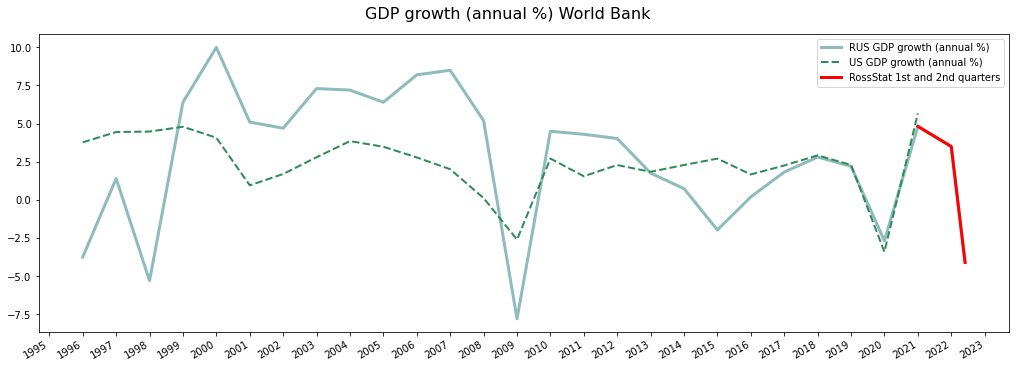

In [100]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates

#WITH THIS YEAR FIGURES: 

fig, ax = plt.subplots( figsize=(14, 5), constrained_layout=True)
date = pd.Timestamp('2021-01-01')
segment1 = (updated.year<date)
segment2 = (updated.year>=date)

ax.plot(updated.year, updated['RUS_gdp'],linewidth=3, color='cadetblue',alpha=0.7)
ax.plot(updated.year, updated['USA_gdp'],linewidth=2,linestyle= 'dashed', color='seagreen')
ax.plot(updated.year[segment2], updated['RUS_gdp'][segment2],linewidth=3, color='red')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.legend(['RUS GDP growth (annual %)', 'US GDP growth (annual %)','RossStat 1st and 2nd quarters' ])

fig.suptitle('GDP growth (annual %) World Bank', fontsize=16)
plt.savefig(str(new_dir)+ '/gdp_growth_rate_ROSS_world_data.jpg')


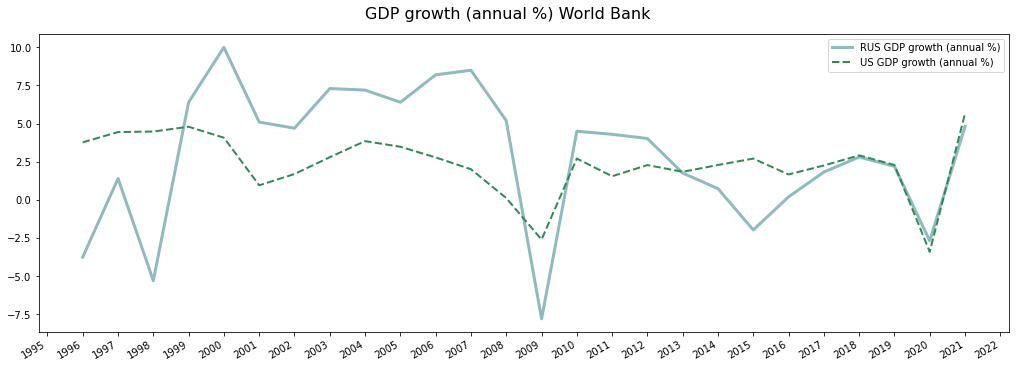

In [101]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates


fig, ax = plt.subplots( figsize=(14, 5), constrained_layout=True)


ax.plot(wb_data_gdp_growth.year, wb_data_gdp_growth['RUS_gdp'],linewidth=3, color='cadetblue',alpha=0.7)
ax.plot(wb_data_gdp_growth.year, wb_data_gdp_growth['USA_gdp'],linewidth=2,linestyle= 'dashed', color='seagreen')


ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.legend(['RUS GDP growth (annual %)', 'US GDP growth (annual %)' ])

fig.suptitle('GDP growth (annual %) World Bank', fontsize=16)

plt.savefig(str(new_dir)+ '/gdp_growth_rate_world_data.jpg')

In [102]:

wb_data_gdp_val = pd.read_csv('/content/drive/MyDrive/RUSSdata/World_Bank/'+date_work+'/w_bank_GDP_value.csv') 
wb_data_gdp_val['year'] = pd.to_datetime(wb_data_gdp_val['year'].astype(str).str.strip(), format='%Y')

In [103]:
wb_short_gdp_val = wb_data_gdp_val[wb_data_gdp_val['year']>'1995']
wb_short_gdp_val.tail(3)

,year,RUS_gdp,USA_gdp
28,2019-01-01,1.693114e+12,2.137257e+13
29,2020-01-01,1.488322e+12,2.089374e+13
30,2021-01-01,1.775800e+12,2.299610e+13


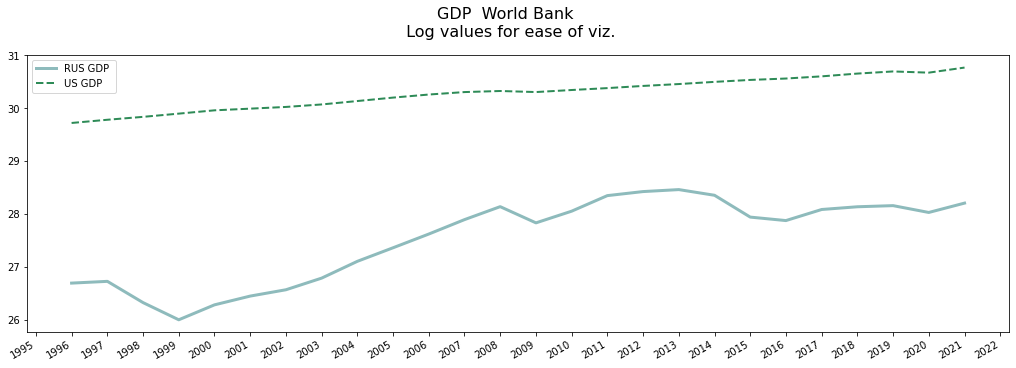

In [104]:
fig, ax = plt.subplots( figsize=(14, 5), constrained_layout=True)


ax.plot(wb_short_gdp_val.year, np.log(wb_short_gdp_val['RUS_gdp']),linewidth=3, color='cadetblue',alpha=0.7)
ax.plot(wb_short_gdp_val.year, np.log(wb_short_gdp_val['USA_gdp']),linewidth=2,linestyle= 'dashed', color='seagreen')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.legend(['RUS GDP ', 'US GDP' ])

fig.suptitle('GDP  World Bank \n Log values for ease of viz.', fontsize=16)
plt.savefig(str(new_dir)+ '/gdp_rate_world_data.jpg')

In [105]:
gdp_pp_grow = pd.read_csv('/content/drive/MyDrive/RUSSdata/World_Bank/'+date_work+'/w_bank_GDPP_grow.csv') 
gdp_pp_grow['year'] = pd.to_datetime(gdp_pp_grow['year'].astype(str).str.strip(), format='%Y')
gdp_pp_grow.tail(3)

,year,RUS_gdPP,USA_gdPP
23,2019-01-01,2.243980,1.824124
24,2020-01-01,-2.480729,-4.328618
25,2021-01-01,5.234384,5.546087


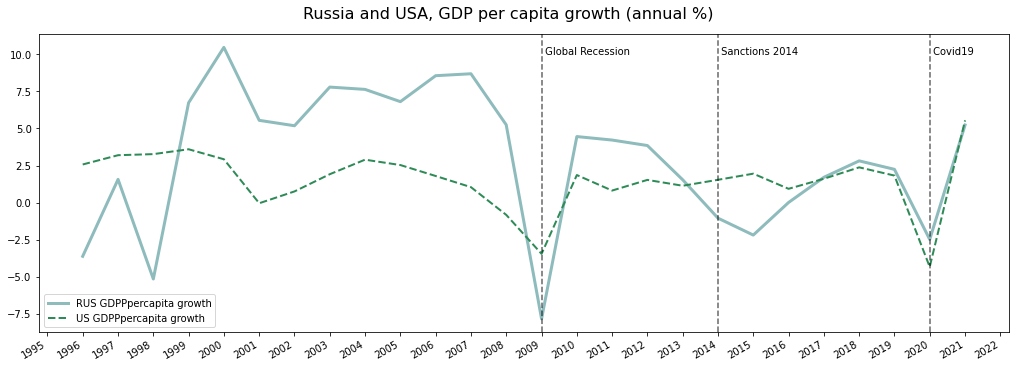

In [106]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)
import matplotlib.dates as mdates

fig, ax = plt.subplots( figsize=(14, 5), constrained_layout=True)


ax.plot(gdp_pp_grow.year, gdp_pp_grow['RUS_gdPP'],linewidth=3, color='cadetblue',alpha=0.7)

ax.plot(gdp_pp_grow.year, gdp_pp_grow['USA_gdPP'],linewidth=2,linestyle= 'dashed', color='seagreen')


ax.axvline(pd.Timestamp('2009'),color='black',linestyle='dashed', alpha=0.6)
ax.text(x=pd.Timestamp('2009'), y=10, s=' Global Recession', color='black', horizontalalignment="left")

ax.axvline(pd.Timestamp('2014'),color='black',linestyle='dashed', alpha=0.6)
ax.text(x=pd.Timestamp('2014'), y=10, s=' Sanctions 2014',color='black', horizontalalignment="left")

ax.axvline(pd.Timestamp('2020'),color='black',linestyle='dashed', alpha=0.6)
ax.text(x=pd.Timestamp('2020'), y=10, s=' Covid19',color='black', horizontalalignment="left")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.legend(['RUS GDPPpercapita growth', 'US GDPPpercapita growth' ], loc='lower left')

fig.suptitle('Russia and USA, GDP per capita growth (annual %)', fontsize=16)

plt.savefig(str(new_dir)+ '/GDPP_per_Capita_grow.jpg')

insert from ukraine folder for EU and US attitudes

In [107]:

eu_att = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Attitude to the EU.csv')
eu_att['date'] = pd.to_datetime(eu_att['date'].str.strip(), format='%Y-%m')

In [108]:
us_att = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Attitude to the US.csv')
us_att['date'] = pd.to_datetime(us_att['date'].str.strip(), format='%Y-%m')

In [109]:
eu_att_gr =(eu_att.groupby(pd.Grouper(key='date', axis=0, freq='Y')).mean()).reset_index()
us_att_gr =(us_att.groupby(pd.Grouper(key='date', axis=0, freq='Y')).mean()).reset_index()

In [110]:
us_att_gr  = us_att_gr [us_att_gr ['date']>'1999']

In [111]:
eu_att.tail()

,date,Positive,Negative,Difficult to answer
114,2021-11-01,48.0,38.0,14.0
115,2022-02-01,37.0,48.0,15.0
116,2022-03-01,21.0,67.0,12.0
117,2022-05-01,16.0,69.0,15.0
118,2022-08-01,23.0,65.0,12.0


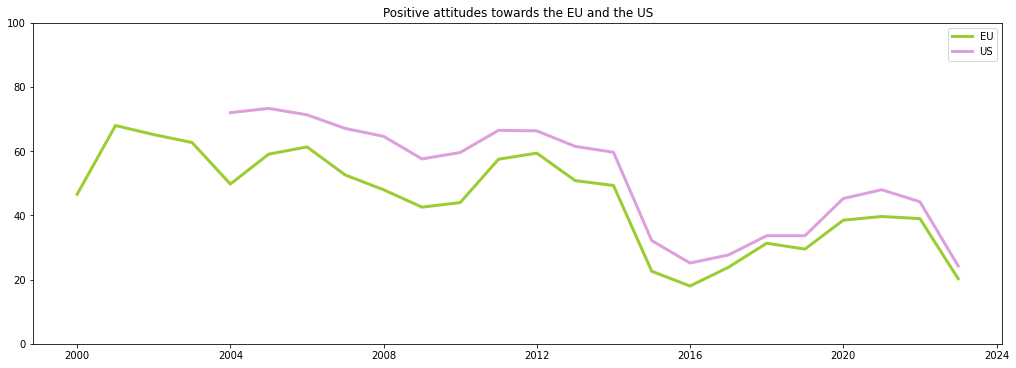

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots( figsize=(14, 5), constrained_layout=True)

plt.ylim(0,100, 10)
plt.plot(us_att_gr.date,us_att_gr['Positive'],linewidth=3, color='yellowgreen' )
plt.plot(eu_att_gr.date, eu_att_gr['Positive'], linewidth=3, color='plum' )
    
plt.legend(['EU', 'US' ])
plt.title('Positive attitudes towards the EU and the US')
plt.savefig(str(new_dir)+ '/no_annotation_eu_us_ratings.jpg')

"1 May 2004 – 10 new countries

Cyprus and Malta join the EU along with 8 Central and Eastern European countries — Czechia, Estonia, Hungary, Latvia, Lithuania, Poland, Slovakia and Slovenia — finally ending the division of Europe after the Second World War."

source: https://european-union.europa.eu/principles-countries-history/history-eu/2000-09_en

"Date: Major combat phase: 7 August 1999 – 30 April 2000, (8 months and 24 days) source: https://en.wikipedia.org/wiki/Second_Chechen_War


In [113]:
data_event =  ['Chechnya,\n major combat phase', 'Eastern European\n countries in EU', 'Georgia\n North Caucasus', 'Ukraine, \nphase 1', 'Ukraine,\nphase 2' ]
data_year = ['2000','2004','2009', '2015', '2022-04']
data_timestamp=[]

In [114]:
for item in data_year:
  temp = pd.Timestamp(item)
  data_timestamp.append(temp)
data_timestamp

[Timestamp('2000-01-01 00:00:00'),
 Timestamp('2004-01-01 00:00:00'),
 Timestamp('2009-01-01 00:00:00'),
 Timestamp('2015-01-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00')]

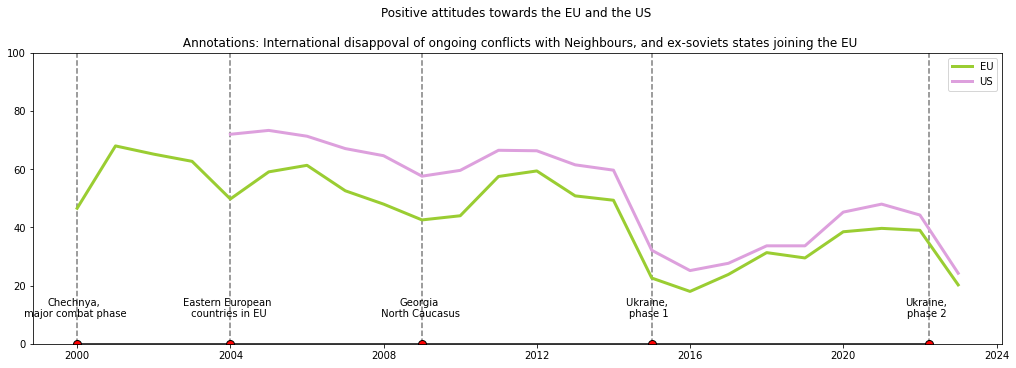

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots( figsize=(14, 5), constrained_layout=True)

plt.ylim(0,100, 10)
plt.plot(us_att_gr.date,us_att_gr['Positive'],linewidth=3, color='yellowgreen' )
plt.plot(eu_att_gr.date, eu_att_gr['Positive'], linewidth=3, color='plum' )


plt.vlines(data_timestamp, 0, 100, linestyle='dashed',color="tab:gray")

# Choose some nice levels
levels = np.tile([ 15 , 15 , 15],
                 int(np.ceil(len(data_event)/3)))[:len(data_event)]
plt.plot(data_timestamp, np.zeros_like(data_timestamp), "-o",
        color="k", markerfacecolor="red", markersize=8, )

# annotate lines

for dc, l, c in zip(data_timestamp, levels, data_event):
    plt.annotate(c, xy=(dc, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="top", wrap=True)
    
plt.legend(['EU', 'US' ])
plt.title('Positive attitudes towards the EU and the US \n \n Annotations: International disappoval of ongoing conflicts with Neighbours, and ex-soviets states joining the EU')
plt.savefig(str(new_dir)+ '/all_time_eu_us_ratings.jpg')

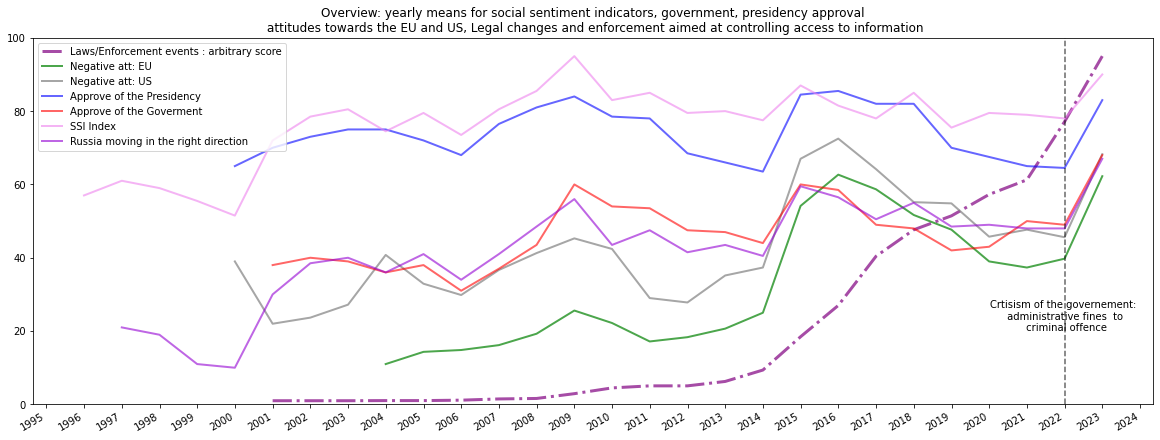

In [116]:

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax  = plt.subplots(figsize=(16, 6), constrained_layout=True)

plt.ylim(0,100, 20)

ax.plot(cens_grouped.datetime, cens_grouped['arb_score_cumsum_scaled'],linewidth=3, linestyle= "dashdot", alpha=0.7, color='purple')
ax.plot(eu_att_gr.date, eu_att_gr['Negative'], linewidth=2,alpha=0.7, color='green')
ax.plot(us_att_gr.date, us_att_gr['Negative'], linewidth=2,alpha=0.7, color='gray')
ax.plot(means_p.date, means_p['Approve'], linewidth=2,alpha=0.6, color='blue')
ax.plot(means_g.date, means_g['Approve'], linewidth=2,alpha=0.6, color='red')
ax.plot(means_ssi.date,means_ssi['Social Sentiment Index'], linewidth=2,alpha=0.6, color='violet' )
ax.plot(means_moving.date,means_moving['In the right direction'], linewidth=2,alpha=0.6, color='darkviolet' )


ax.axvline(pd.Timestamp('2022'),color='black',linestyle='dashed', alpha=0.6)
ax.text(x=pd.Timestamp('2022'), y=20, s='Crtisism of the governement: \n administrative fines  to \n criminal offence', color='black', horizontalalignment="center")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")


plt.legend(['Laws/Enforcement events : arbitrary score','Negative att: EU', 'Negative att: US', 'Approve of the Presidency', 'Approve of the Goverment', 'SSI Index', 'Russia moving in the right direction' ], loc='upper left')
plt.title('Overview: yearly means for social sentiment indicators, government, presidency approval\n attitudes towards the EU and US, Legal changes and enforcement aimed at controlling access to information')

plt.savefig(str(new_dir)+ '/overall_all_indicators_with_censorship.jpg')

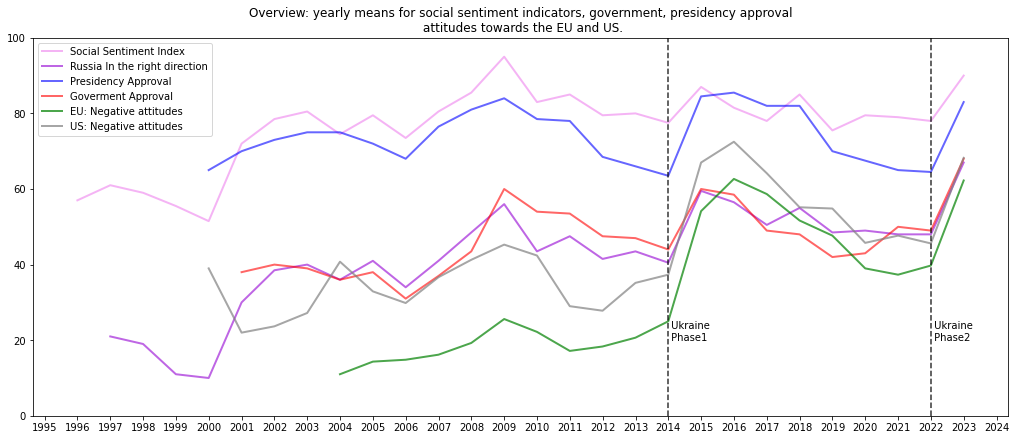

In [117]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax  = plt.subplots(figsize=(14, 6), constrained_layout=True, sharey=True,)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

plt.ylim(0,100, 20)

ax.plot(means_ssi.date,means_ssi['Social Sentiment Index'], linewidth=2,alpha=0.6, color='violet' )
ax.plot(means_moving.date,means_moving['In the right direction'], linewidth=2,alpha=0.6, color='darkviolet' )

ax.plot(means_p.date, means_p['Approve'], linewidth=2,alpha=0.6, color='blue')
ax.plot(means_g.date, means_g['Approve'], linewidth=2,alpha=0.6, color='red')

ax.plot(eu_att_gr.date, eu_att_gr['Negative'], linewidth=2,alpha=0.7, color='green')
ax.plot(us_att_gr.date, us_att_gr['Negative'], linewidth=2,alpha=0.7, color='gray')

ax.axvline(pd.Timestamp('2014'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2014'), y=20, s=' Ukraine\n Phase1', color='black')

ax.axvline(pd.Timestamp('2022'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2022'), y=20, s=' Ukraine\n Phase2', color='black')

plt.legend(['Social Sentiment Index', 'Russia In the right direction','Presidency Approval', 'Goverment Approval', 'EU: Negative attitudes', 'US: Negative attitudes'  ]) #,loc=1, bbox_to_anchor=(0.9,3))
plt.title('Overview: yearly means for social sentiment indicators, government, presidency approval\n attitudes towards the EU and US.')

plt.savefig(str(new_dir)+ '/overall_all_indicators.jpg')

In [118]:
pres_short = president_approval[president_approval['date']>'2022']
gov_short = goverment_approval[goverment_approval['date']>'2022']
mov_short = moving[moving['date']>'2022']
ss_short = ssi[ssi['date']>'2022']
eu_short = eu_att[eu_att['date']>'2022']
us_short = us_att[us_att['date']>'2022']

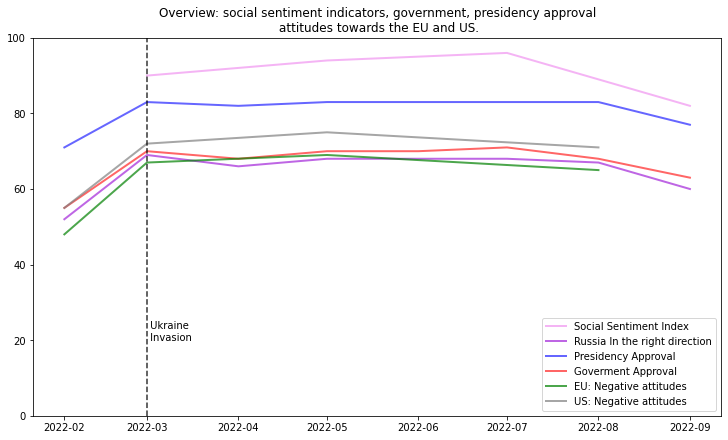

In [119]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

fig, ax  = plt.subplots(figsize=(10, 6), constrained_layout=True, sharey=True,)

plt.ylim(0,100, 20)

ax.plot(ss_short.date,ss_short['Social Sentiment Index'], linewidth=2,alpha=0.6, color='violet' )
ax.plot(mov_short['date'],mov_short['In the right direction'], linewidth=2,alpha=0.6, color='darkviolet' )

ax.plot(pres_short.date, pres_short['Approve'], linewidth=2,alpha=0.6, color='blue')
ax.plot(gov_short.date, gov_short['Approve'], linewidth=2,alpha=0.6, color='red')

ax.plot(eu_short.date, eu_short['Negative'], linewidth=2,alpha=0.7, color='green')
ax.plot(us_short.date, us_short['Negative'], linewidth=2,alpha=0.7, color='gray')

ax.axvline(pd.Timestamp('2022-03'),color='black',linestyle='dashed', alpha=0.8)
ax.text(x=pd.Timestamp('2022-03'), y=20, s=' Ukraine\n Invasion', color='black')

plt.legend(['Social Sentiment Index', 'Russia In the right direction','Presidency Approval', 'Goverment Approval', 'EU: Negative attitudes', 'US: Negative attitudes'  ]) #,loc=1, bbox_to_anchor=(0.9,3))
plt.title('Overview: social sentiment indicators, government, presidency approval\n attitudes towards the EU and US.')

plt.savefig(str(new_dir)+ '/overall_all_indicators_zoomed_in.jpg')